sistema de reconocimiento de placas (ALPR).

In [ ]:
import yaml

# data = {
#     'path': '../datasets/dataset_01',
#     'train': 'images/train',
#     'val': 'images/val',
#     'test': 'images/test',
#     'names': {
#         1: 'Placa'
#     }
# }
data = {
    'path': '../datasets/Proyecto Placas.v1-primera-version.yolov8-obb',
    'train': 'train/images',
    'val': 'valid/images',
    'test': 'test/images',
    'names': {
        0: 'Placa'
    }
}

with open('datasets/dataset_01/data.yaml', 'w') as file:
    yaml.dump(data, file,
              default_flow_style=False,
              sort_keys=False)


4. Afinación de YOLO11 (detección) con el dataset
Para poder acceder al modelo pre-entrenado debemos comenzar instalando la librería "ultralytics":

In [51]:
!pip install ultralytics

In [52]:
from ultralytics import YOLO

# 1. Cargar el modelo (nano, el más pequeño)
# model = YOLO("yolo11n.pt")
model = YOLO("yolo26m.pt")


# Afinar el modelo
# results = model.train(data="datasets/dataset_01/data.yaml",
results = model.train(data="datasets/Proyecto Placas.v1-primera-version.yolov8-obb/data.yaml",
                      epochs=10, # Número de iteraciones
                      imgsz=640, # Tamaño de las imágenes (máxima dimensión)
                      plots=True, # Guardar gráficos de entrenamiento
                      )

New https://pypi.org/project/ultralytics/8.4.8 available  Update with 'pip install -U ultralytics'
Ultralytics 8.4.7  Python-3.13.5 torch-2.9.1+cpu CPU (AMD Ryzen 7 8700G w/ Radeon 780M Graphics)
engine\trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=datasets/Proyecto Placas.v1-primera-version.yolov8-obb/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo26m.pt, momentum=0.937, mosaic=1.0, mul

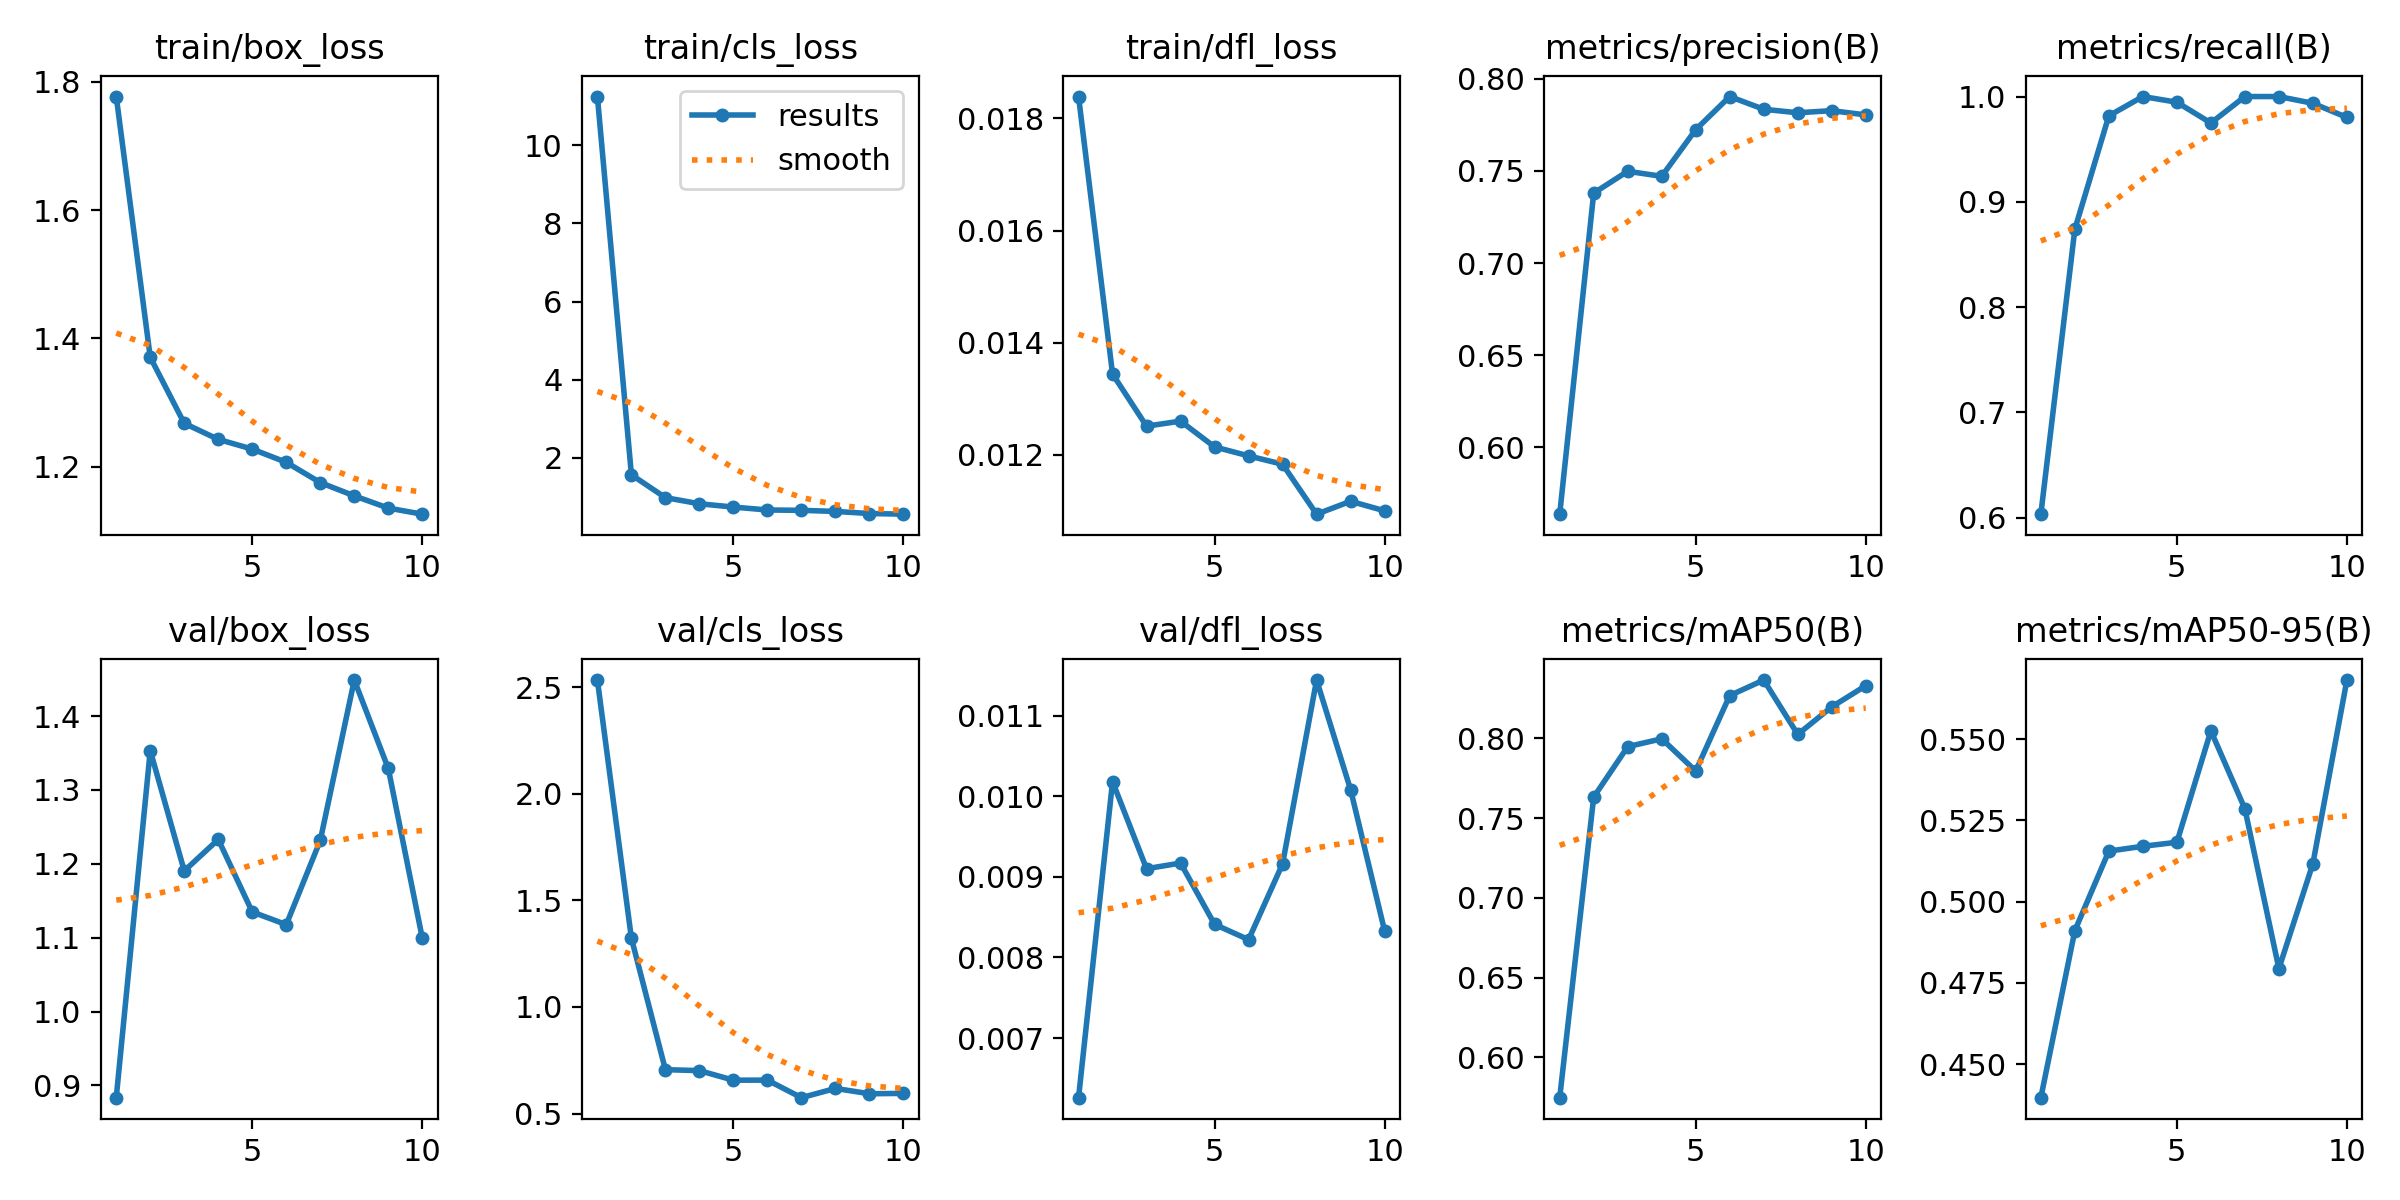

In [53]:
from IPython.display import Image as IPyImage

IPyImage(filename='runs/detect/train/results.png', width=800)

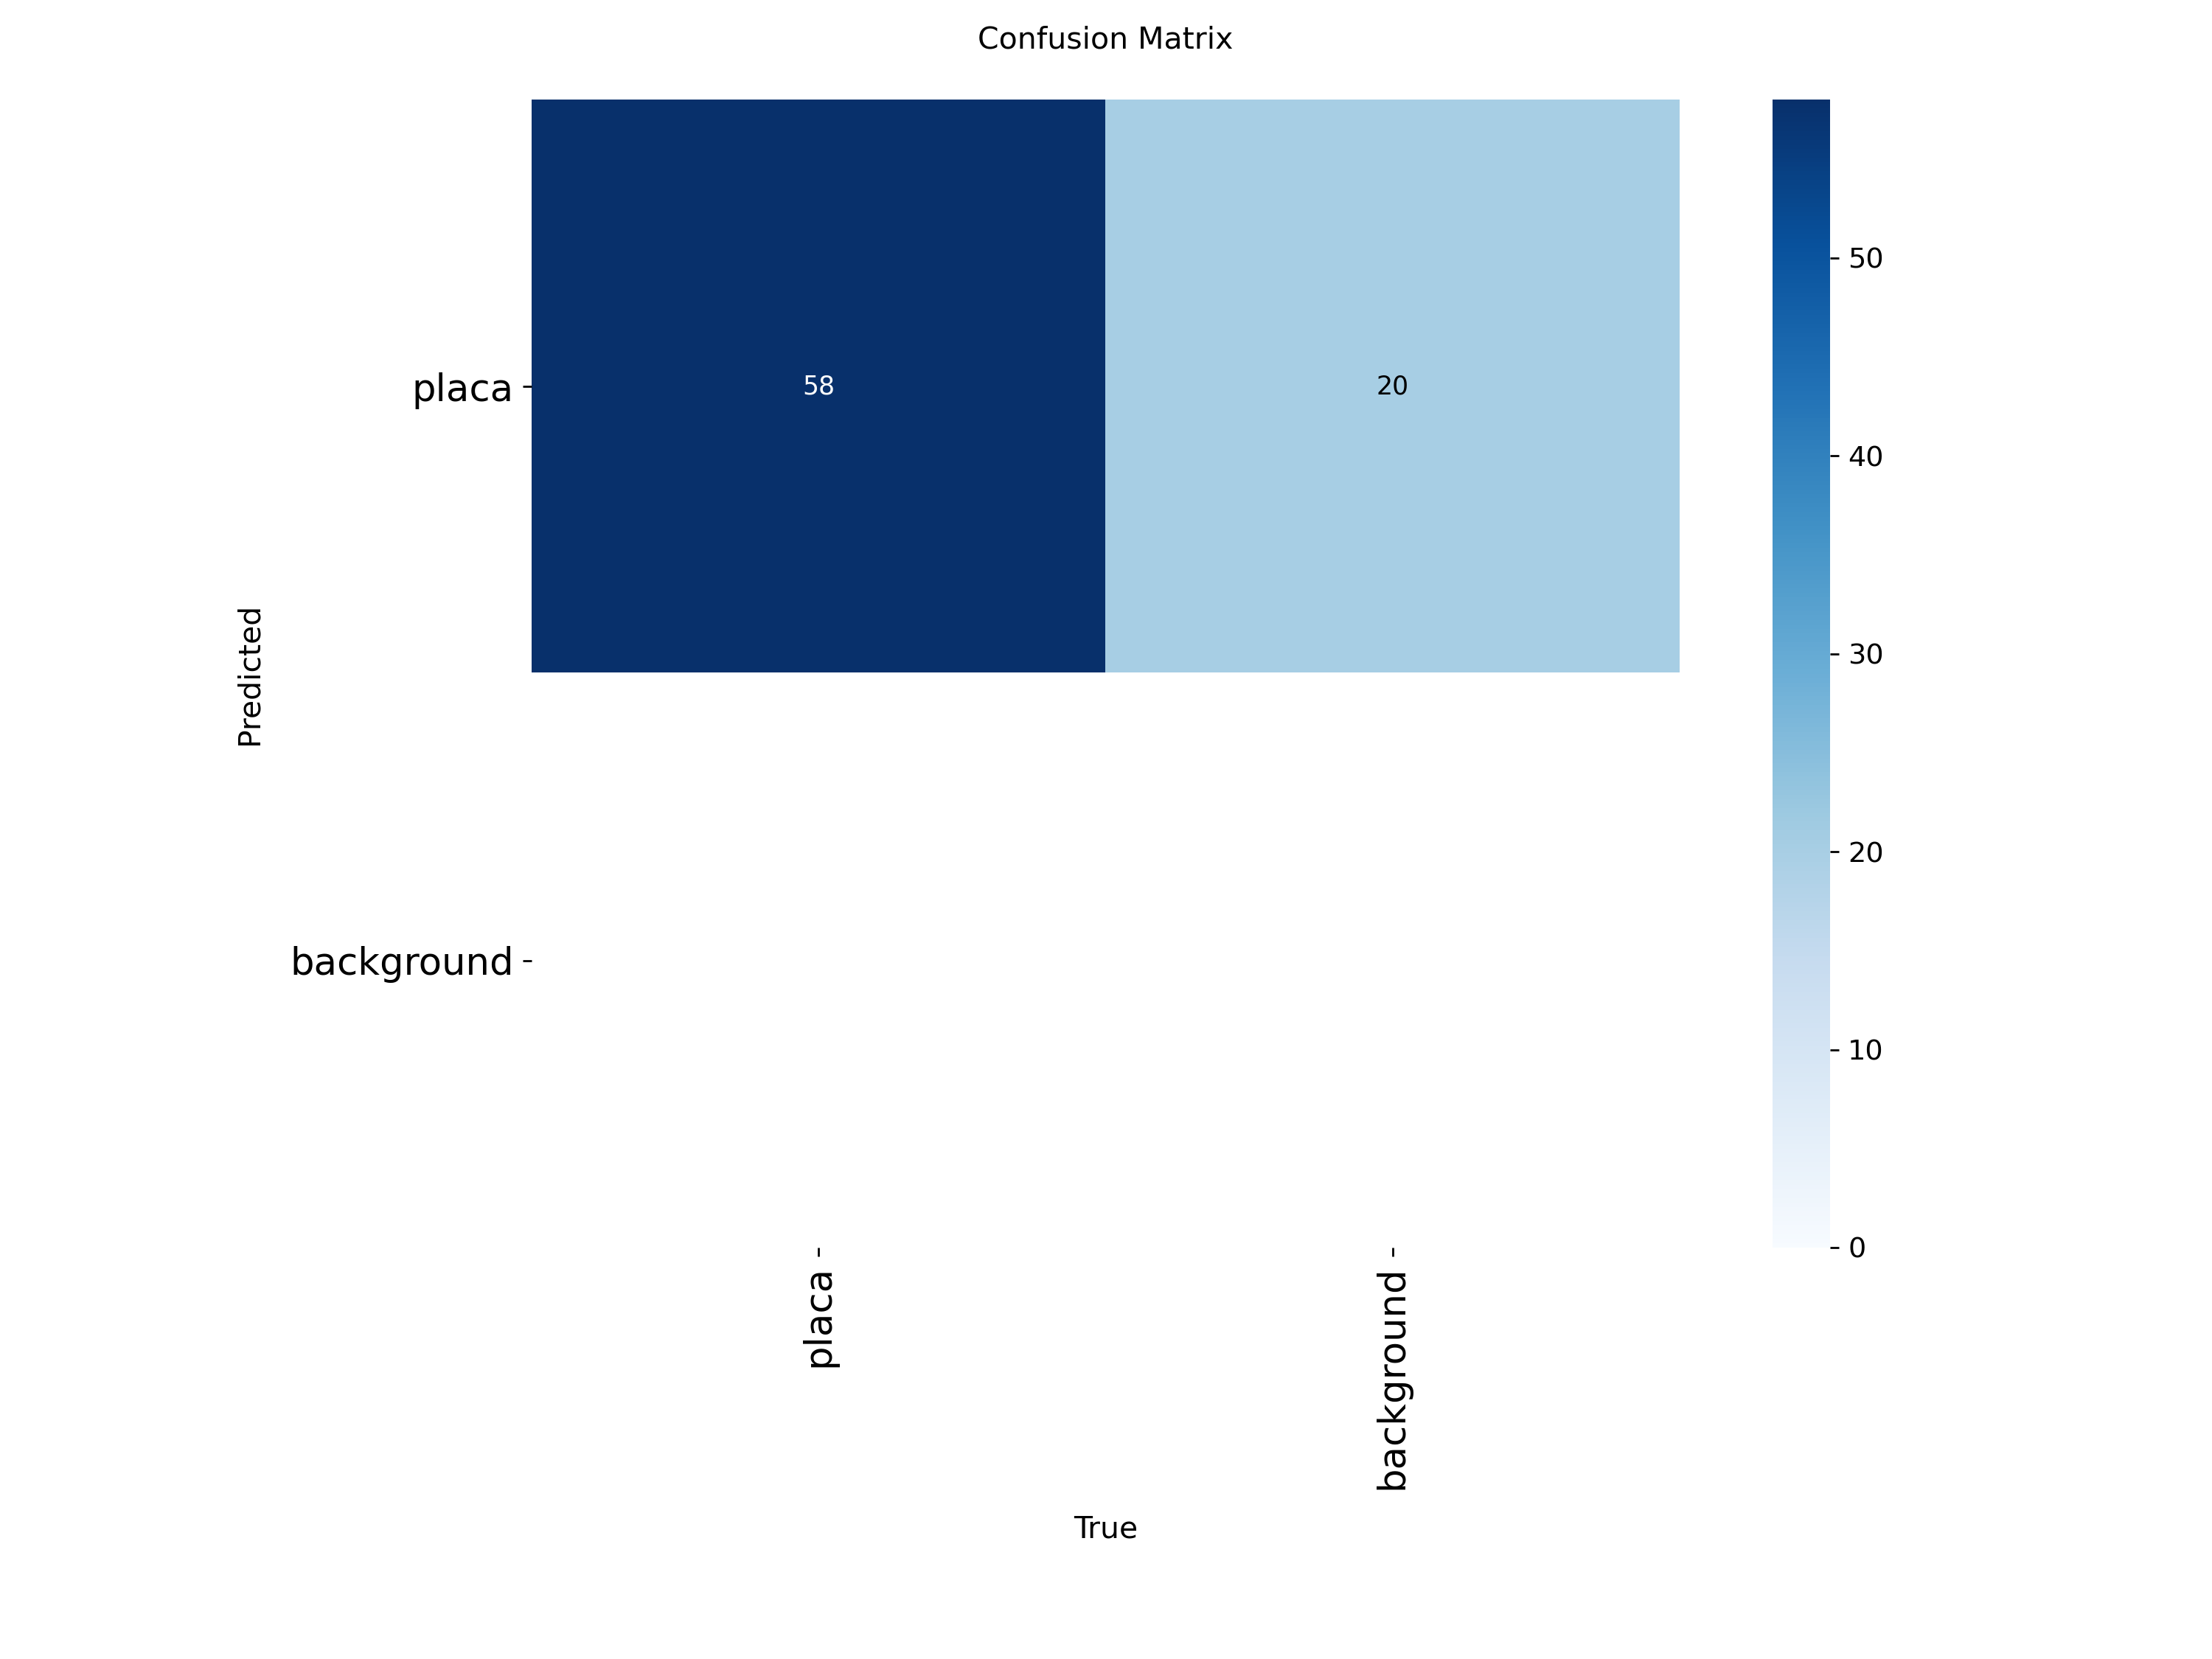

In [54]:
IPyImage(filename='runs/detect/train/confusion_matrix.png', width=600)

In [55]:
model = YOLO('runs/detect/train/weights/best.pt')

In [56]:
preds = model('datasets/Proyecto Placas.v1-primera-version.yolov8-obb/test/images')


image 1/38 d:\BACKEND\ai-webcam-detector\datasets\Proyecto Placas.v1-primera-version.yolov8-obb\test\images\117_jpg.rf.664e59f0f03afa6705ce9578855fbfe2.jpg: 640x640 1 placa, 210.6ms
image 2/38 d:\BACKEND\ai-webcam-detector\datasets\Proyecto Placas.v1-primera-version.yolov8-obb\test\images\120_jpg.rf.02ee798e390caecbf9784f712a99ceb5.jpg: 640x640 1 placa, 177.8ms
image 3/38 d:\BACKEND\ai-webcam-detector\datasets\Proyecto Placas.v1-primera-version.yolov8-obb\test\images\125_jpg.rf.7cc4a67aeb3387070646dc003ba89a18.jpg: 640x640 1 placa, 187.8ms
image 4/38 d:\BACKEND\ai-webcam-detector\datasets\Proyecto Placas.v1-primera-version.yolov8-obb\test\images\126.rf.d9de989d7cfd21e24f258b2d0dab63ff.jpg: 640x640 1 placa, 182.6ms
image 5/38 d:\BACKEND\ai-webcam-detector\datasets\Proyecto Placas.v1-primera-version.yolov8-obb\test\images\136_jpg.rf.0b87548f6482dcc4bcbd4b3b1abfb513.jpg: 640x640 1 placa, 180.8ms
image 6/38 d:\BACKEND\ai-webcam-detector\datasets\Proyecto Placas.v1-primera-version.yolov8-o

In [ ]:
# Mostrar predicciones
preds[35].show()

: 

In [47]:
preds = model('datasets/dataset_vehiculos/images/test2')


image 1/1 d:\BACKEND\ai-webcam-detector\datasets\dataset_vehiculos\images\test2\depositphotos_115262096-stock-photo-traffic-on-calle-5-in.jpg: 448x640 (no detections), 38.1ms
Speed: 1.0ms preprocess, 38.1ms inference, 0.3ms postprocess per image at shape (1, 3, 448, 640)


In [48]:
preds[0].show()

Note: you may need to restart the kernel to use updated packages.


ERROR: Ignored the following yanked versions: 0.9.0, 0.9.1, 0.9.2, 0.9.3, 0.9.4, 0.9.5, 0.9.6, 0.9.7rc2, 0.9.7, 0.9.8, 0.9.9rc23, 0.9.9, 0.9.10rc3, 0.9.10, 0.9.11rc1, 0.9.11rc2, 0.9.11, 0.9.12rc1, 0.9.12rc3, 0.9.12, 0.9.13, 0.9.14, 0.9.15rc1, 0.9.15, 0.9.16, 0.9.17
ERROR: Ignored the following versions that require a different python version: 0.10.0 Requires-Python >=3.8,<3.12; 0.11.0 Requires-Python >=3.8,<3.12; 0.11.1 Requires-Python >=3.8,<3.12; 0.11.2 Requires-Python >=3.8,<3.12; 0.12.0 Requires-Python >=3.8,<3.12; 0.12.1 Requires-Python >=3.8,<3.12; 0.13.0 Requires-Python >=3.8,<3.12; 0.14.0 Requires-Python >=3.8,<3.12; 0.14.1 Requires-Python >=3.8,<3.12; 0.15.0 Requires-Python >=3.8,<3.12; 0.15.1 Requires-Python >=3.8,<3.12; 0.15.2 Requires-Python >=3.8,<3.12; 0.16.0 Requires-Python >=3.8,<3.12; 0.16.2 Requires-Python >=3.8,<3.12; 0.16.3 Requires-Python >=3.8,<3.12; 0.17.0 Requires-Python >=3.8,<3.12; 0.17.1 Requires-Python >=3.8,<3.12; 0.18.0 Requires-Python >=3.8,<3.12; 0.18.1 